<a href="https://colab.research.google.com/github/electrojam/Curso-de-Clustering-con-Python-y-scikit-learn/blob/main/primer_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Primer Clustering con Scikit-learn

Curso de Clustering con Python y scikit-learn

## Importar librerías y carga de datos de prueba

In [1]:
from sklearn.datasets import make_blobs
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# creamos dos objetos con función con 100 ejemplos o data points, con 4 centros o clusters, número de features=2, desv standar del cluster
x, y = make_blobs(n_samples=100, centers=4, n_features=2, cluster_std=[1, 1.5, 2, 2], random_state=7)

In [13]:
# x se creó con dos features o dos columnas
x

array([[ -3.38426057,   5.22173974],
       [ -1.83623836,  -7.73538367],
       [ -7.45617621,   6.19887436],
       [ -1.78504307,   1.60974874],
       [-10.1249098 ,   6.1338052 ],
       [  1.0146433 ,   4.0453507 ],
       [ -0.70092735,  -6.98196818],
       [  8.99757441,  -2.30228718],
       [ -7.9192539 ,   5.72225675],
       [  1.9445622 ,  -7.43742299],
       [ -0.93442649,  -7.78820426],
       [ 11.48819121,   1.33719026],
       [ -2.86067816, -11.24623446],
       [ -7.90577233,   4.84553865],
       [ -2.24228315,   4.38550238],
       [  0.56928691, -10.0571088 ],
       [  0.6237701 ,  -6.12033956],
       [  8.32594634,   0.04535295],
       [ -2.11937574, -10.1833945 ],
       [ -6.70767333,   5.26896209],
       [ -2.52855036,   5.03085908],
       [ -8.19937429,   4.07185131],
       [ -8.86097416,   7.62744807],
       [  0.25552915, -12.26658908],
       [  7.09274235,   1.13571881],
       [ -8.51922024,   4.14769715],
       [  9.58876813,  -2.81738008],
 

In [14]:
# y cuenta con 4 centroides de 0 a 3
y

array([1, 3, 0, 1, 0, 1, 3, 2, 0, 3, 3, 2, 3, 0, 1, 3, 3, 2, 3, 0, 1, 0,
       0, 3, 2, 0, 2, 2, 3, 1, 3, 3, 1, 3, 3, 0, 2, 0, 1, 0, 3, 1, 1, 2,
       1, 2, 0, 0, 2, 0, 2, 3, 2, 3, 1, 0, 1, 3, 1, 1, 1, 3, 1, 2, 0, 2,
       0, 2, 2, 1, 0, 2, 0, 0, 2, 2, 2, 2, 3, 1, 1, 1, 0, 3, 2, 3, 2, 0,
       0, 1, 3, 1, 0, 3, 2, 2, 3, 1, 0, 1])

In [15]:
# creamos un data frame
df_blobs = pd.DataFrame({
    'x1': x[:,0],
    'x2': x[:,1],
    'y': y
})

In [17]:
# df_blobs solo se utilizará para comprobar los datos, más no para ejecutar el cluster
df_blobs

,x1,x2,y
0,-3.384261,5.221740,1
1,-1.836238,-7.735384,3
2,-7.456176,6.198874,0
3,-1.785043,1.609749,1
4,-10.124910,6.133805,0
...,...,...,...
95,7.072755,-0.259937,2
96,-2.626873,-7.228570,3
97,-1.521099,1.802284,1
98,-9.216388,6.670846,0


In [29]:
# creamos función para graficar df, en 2d porque solo se tienen dos dimensiones (columnas) del df
def plot_2d_clusters(x,y,ax):  # ax es donde se va a ubicar la gráfica en matplotlib
  y_uniques = pd.Series(y).unique()

  for _ in y_uniques:
    x[y==_].plot(
        title=f'{len(y_uniques)}',
        kind='scatter',
        x='x1',
        y='x2',
        marker=f'${_}$',
        ax=ax
    )

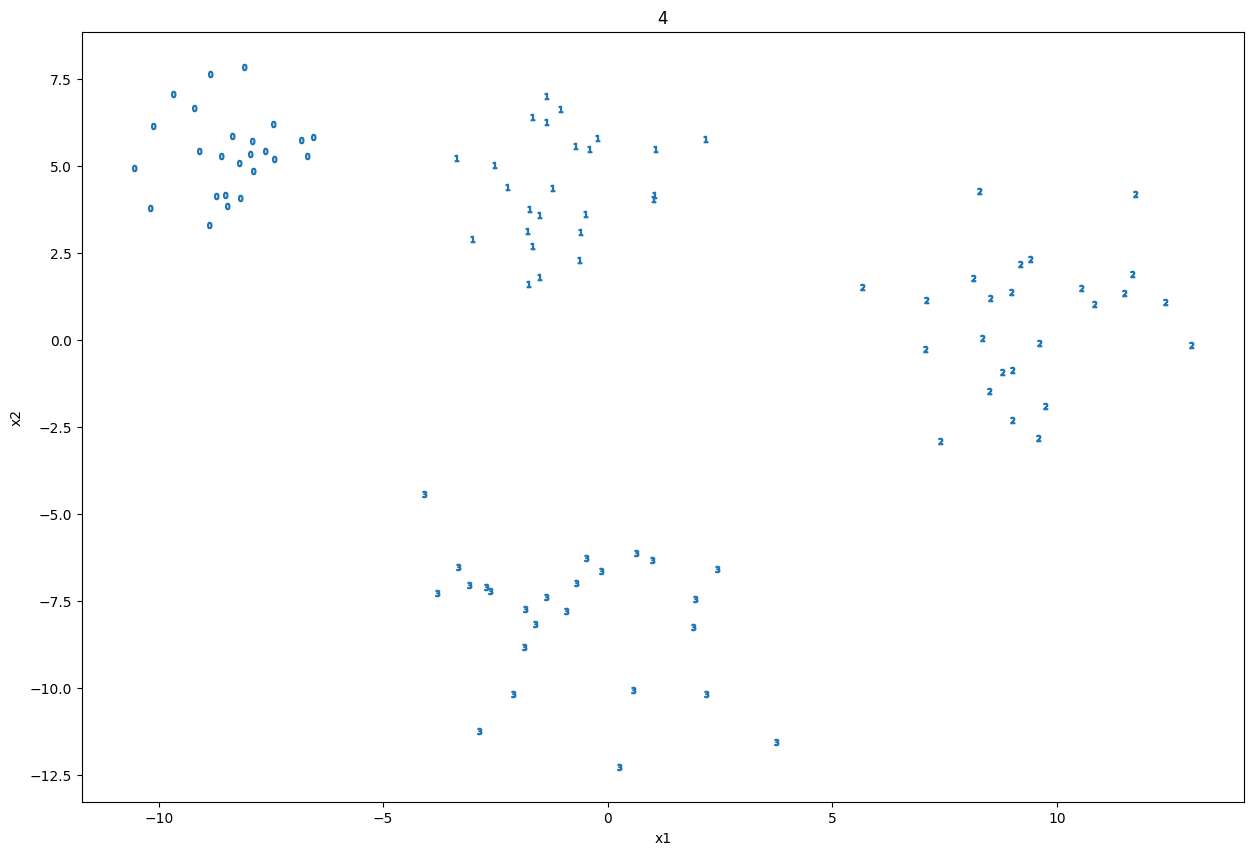

In [30]:
# Probamos la función de graficar plot_2d_cluster
fig, ax = plt.subplots(1,1, figsize=(15,10))
x, y = df_blobs[['x1', 'x2']], df_blobs['y']
plot_2d_clusters(x,y,ax)

## Aplicando clustering

In [23]:
# Importamos librería KMeans
from sklearn.cluster import KMeans

In [26]:
# definimos objeto con modelo KMeans, que tenga 4 clusters
kmeans = KMeans(n_clusters=4, random_state=7)

In [27]:
# Entrenamos modelo creado (Kmeans)
y_pred = kmeans.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [28]:
y_pred

array([3, 2, 0, 3, 0, 3, 2, 1, 0, 2, 2, 1, 2, 0, 3, 2, 2, 1, 2, 0, 3, 0,
       0, 2, 1, 0, 1, 1, 2, 3, 2, 2, 3, 2, 2, 0, 1, 0, 3, 0, 2, 3, 3, 1,
       3, 1, 0, 0, 1, 0, 1, 2, 1, 2, 3, 0, 3, 2, 3, 3, 3, 2, 3, 1, 0, 1,
       0, 1, 1, 3, 0, 1, 0, 0, 1, 1, 1, 1, 2, 3, 3, 3, 0, 2, 1, 2, 1, 0,
       0, 3, 2, 3, 0, 2, 1, 1, 2, 3, 0, 3], dtype=int32)

Text(0.5, 1.0, 'KMeans 4')

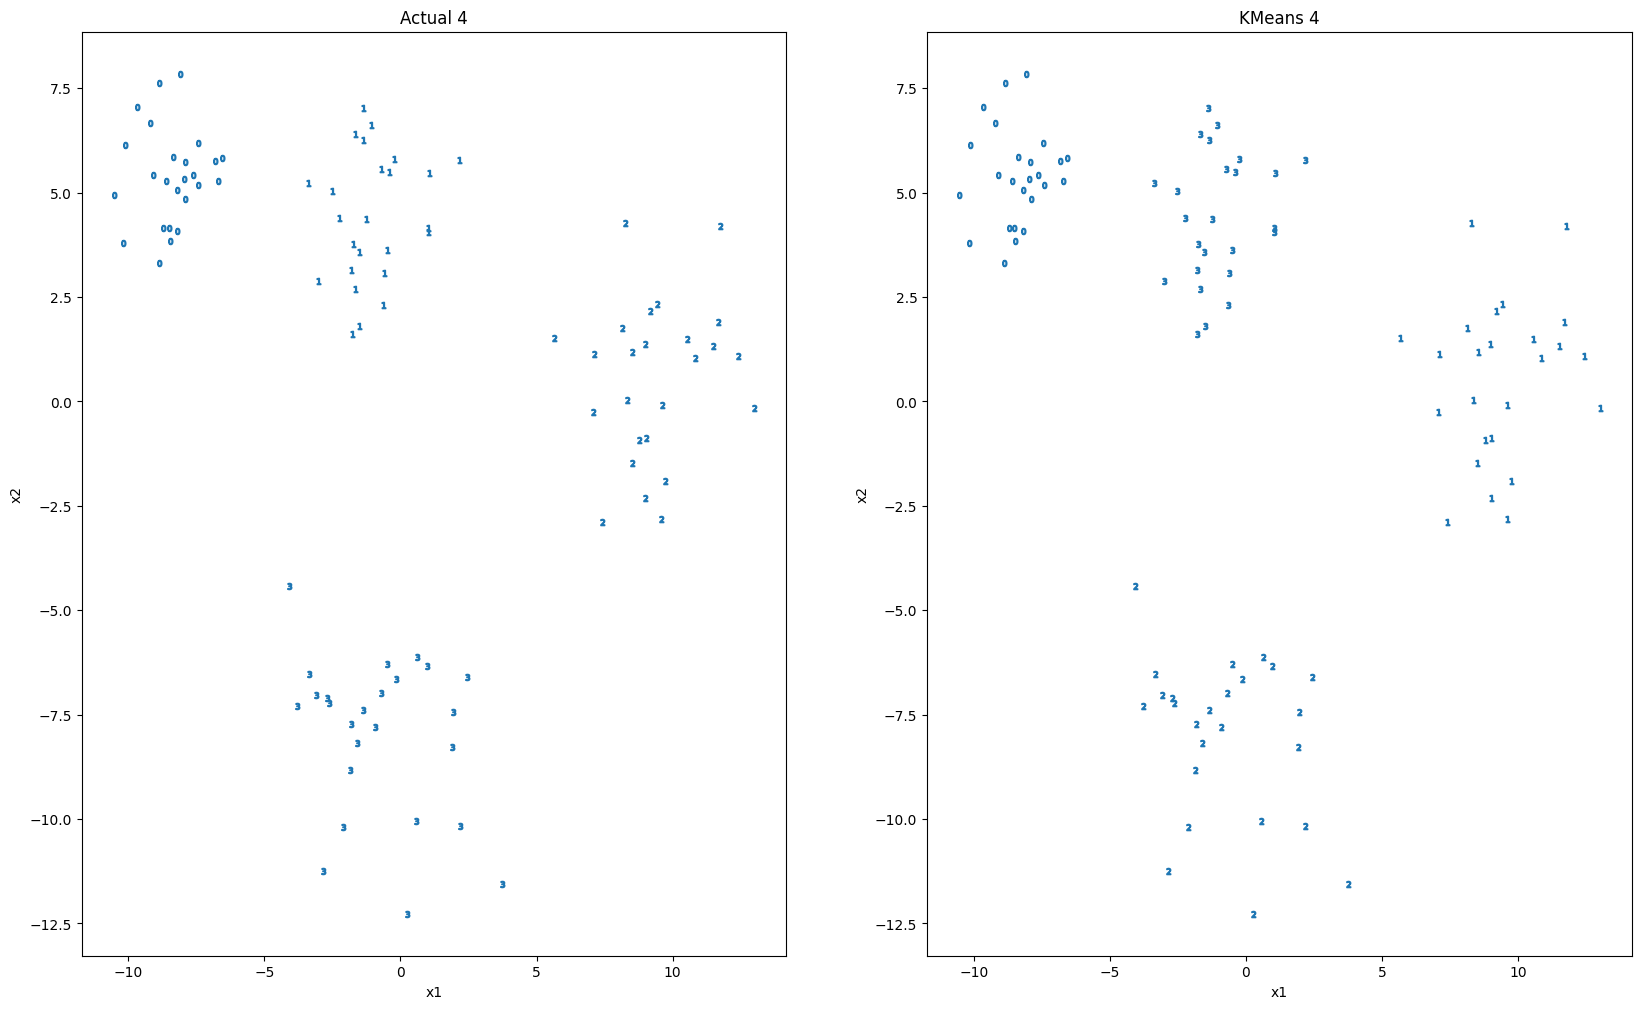

In [35]:
# Visualizamos nuestros datos
fig, axs = plt.subplots(1,2, figsize=(20,12))
plot_2d_clusters(x,y, axs[0])
plot_2d_clusters(x,y_pred, axs[1])

axs[0].set_title(f'Actual {axs[0].get_title()}')
axs[1].set_title(f'KMeans {axs[1].get_title()}')